# Automate getting guided modes of slab waveguide

Should be able to do this generally.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real
from scipy.optimize import newton
from IPython.display import Video


In [2]:
A = SlabExact(symmetric=True)

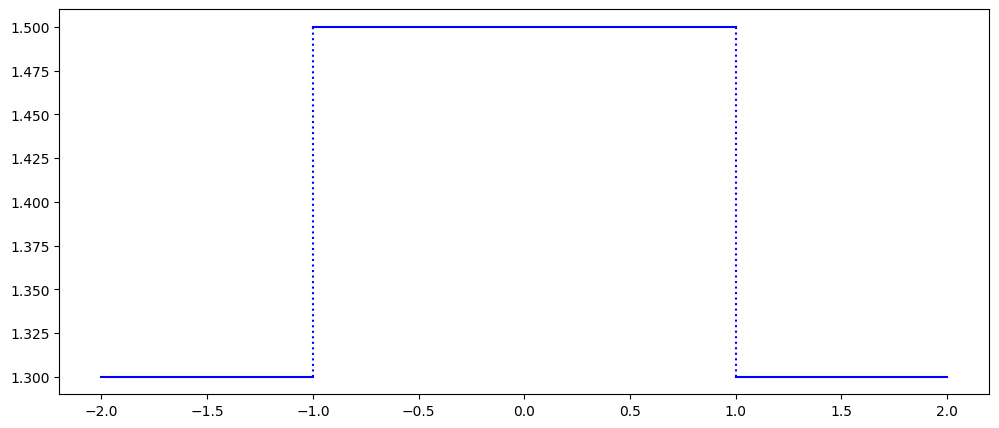

In [3]:
A.plot_refractive_index()

In [4]:
field_type = 'TM'
mode_type = 'guided'

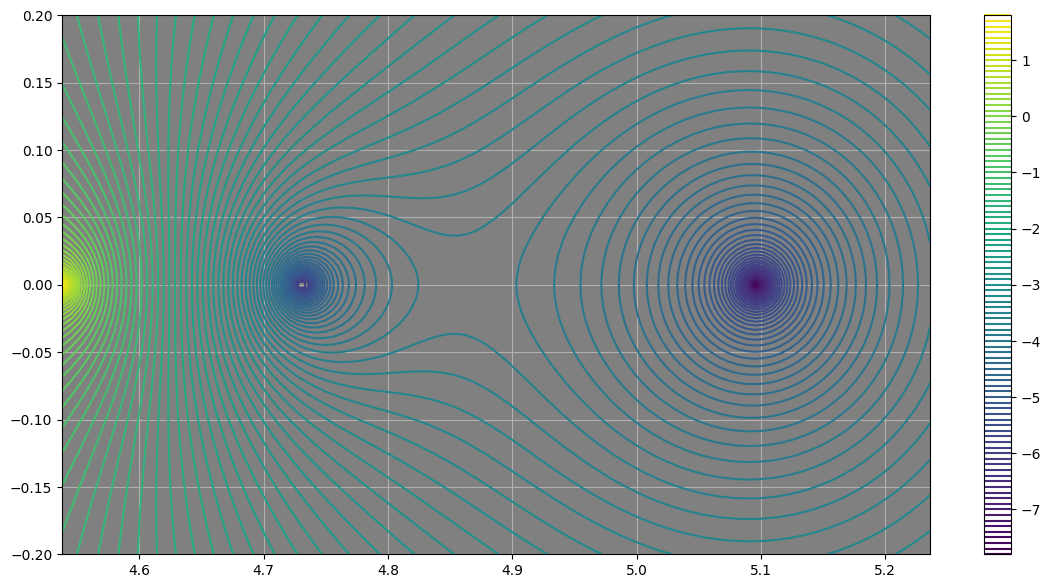

In [5]:
plotlogf(A.determinant, A.K_low, A.K_high, -.2, .2, field_type, mode_type, iref=100, rref=100,levels=100)

In [7]:
beta1 = newton(A.determinant, 4.75, args=('TM', mode_type))
beta2 = newton(A.determinant, 5.1, args=('TM', mode_type))

beta3 = newton(A.determinant, 4.75, args=('TE', mode_type))
beta4 = newton(A.determinant, 5.1, args=('TE', mode_type))

beta1, beta2, beta3, beta4

((4.731416702671911+8.988569602447734e-18j),
 (5.096576273716205+5.435874065949148e-19j),
 (4.767530368632624+1.1013871733524578e-17j),
 (5.113615861790036-2.539410611341006e-17j))

In [8]:
Fs1 = A.fields(beta1, field_type='TM', mode_type=mode_type)
Fs2 = A.fields(beta2, field_type='TM', mode_type=mode_type)
Fs3 = A.fields(beta3, field_type='TE', mode_type=mode_type)
Fs4 = A.fields(beta4, field_type='TE', mode_type=mode_type)

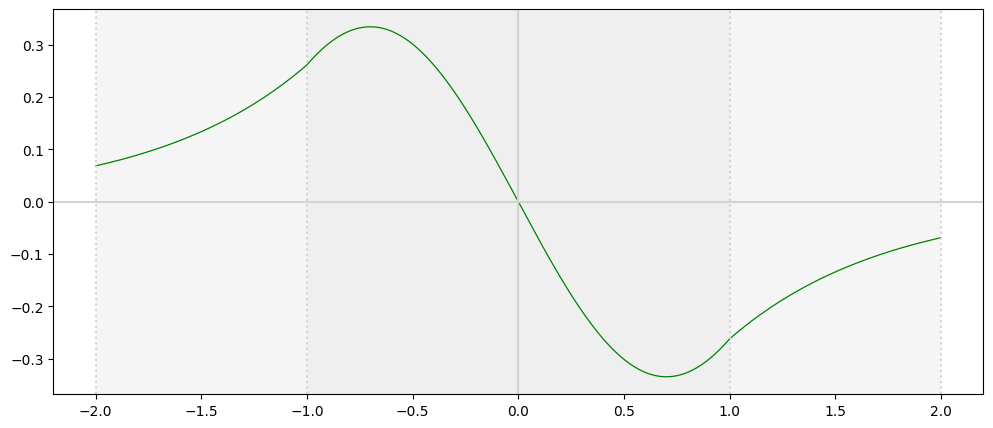

In [9]:
A.plot_field_1d(Fs1, plot_axis=True, linewidth=.9, color='g', label='TM_odd', plot_regions=True, hatch=None)


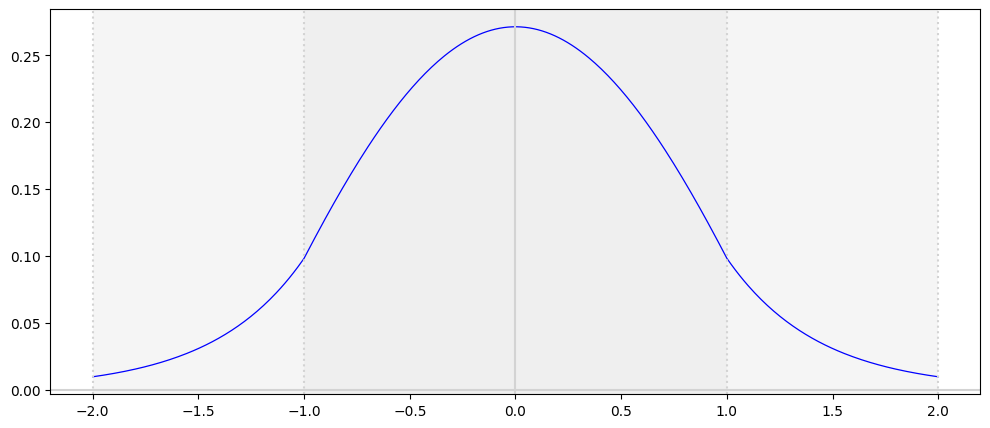

In [16]:
A.plot_field_1d(Fs2, plot_axis=True, linewidth=.9, color='b', label='TM_even', plot_regions=True, hatch=None)


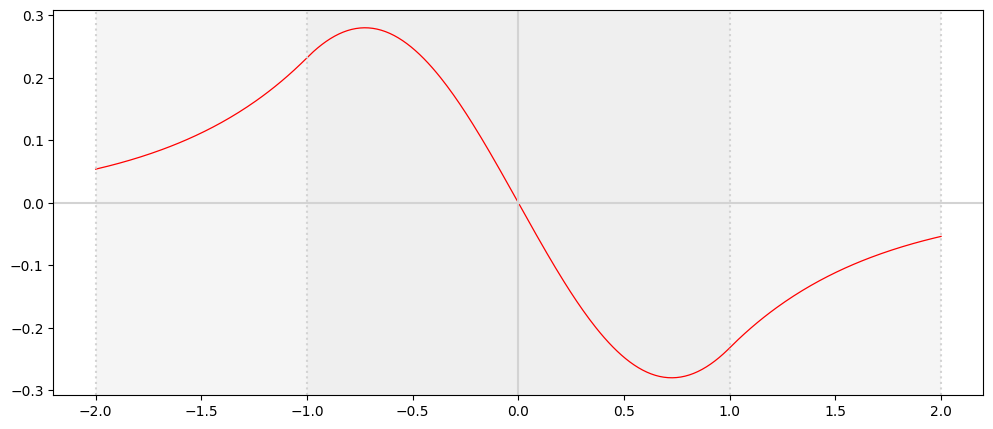

In [17]:
A.plot_field_1d(Fs3, plot_axis=True, linewidth=.9, color='r', label='TE_odd', plot_regions=True, hatch=None)


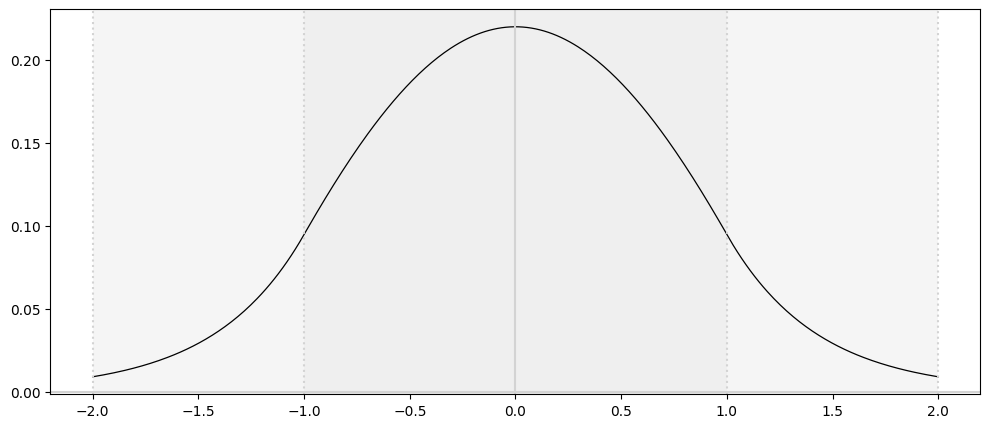

In [18]:
A.plot_field_1d(Fs4, plot_axis=True, linewidth=.9, color='k', label='TE_even', plot_regions=True, hatch=None)

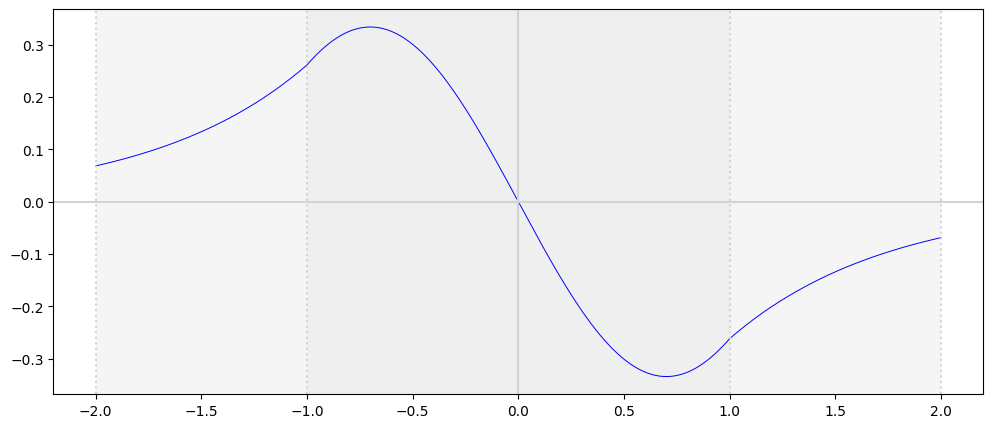

In [20]:
A.animate_field_1d(Fs1, 'videos/odd_guided', linewidth=.7, plot_regions=True, hatch=None)

In [23]:
Video('videos/odd_guided'+'.mp4', html_attributes="controls loop")


## 2D plots

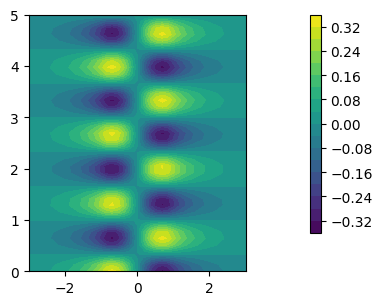

In [24]:
A.plot_field_2d(Fs1, xs=np.linspace(-3,3,40), zmax=5, zref=40, levels=20)

## 2D animations

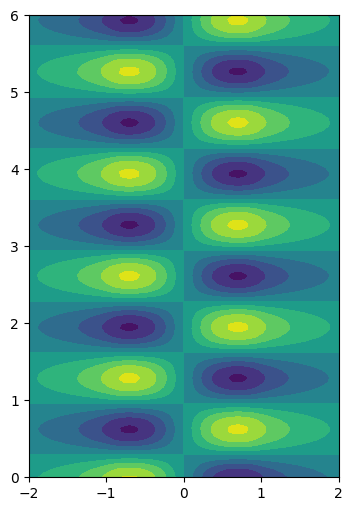

In [29]:
# A.animate_field_2d(Fs1, 'videos/2d_odd_guided', beta1.real, levels=10)

In [25]:
Video('videos/2d_odd_guided'+'.mp4', html_attributes="controls loop")


# Leaky Modes

In [ ]:
field_type = 'TE'
mode_type = 'leaky'

In [ ]:
plotlogf(A.determinant, 1., 4.7, -2, 2, field_type, mode_type, iref=100, rref=100,levels=100)

In [ ]:
beta2 = newton(A.determinant, np.array([4.6-.25j]), args=(field_type, mode_type))[0]
beta2

In [ ]:
Fs2 = A.fields(beta2, field_type=field_type, mode_type=mode_type)

In [ ]:
A.plot_field(Fs2, plot_axis=True, linewidth=.9)

In [ ]:
beta3 = newton(A.determinant, np.array([3.4-1.5j]), args=(field_type, mode_type))[0]
beta3

In [ ]:
Fs3 = A.fields(beta3, field_type=field_type, mode_type=mode_type)

In [ ]:
A.plot_field(Fs3, plot_axis=True, linewidth=.9)

# Does M00 give both leaky and guided modes?

They say M00 also gives eigenequation for leaky modes... but it can't with our choice of branch...

In [10]:
indices=[0,0]
Zl = 'standard'
Zr = 'standard'

/home/pv/local/slab/slab.py:205: UserWarning: Providing indices to determinant overrides mode type and passes Ztype_far_left and Ztype_far_right keywords to transmission matrix. Thisallows for exploration, but may put branch cuts in unexpected places.
  warn('Providing indices to determinant overrides mode type and \


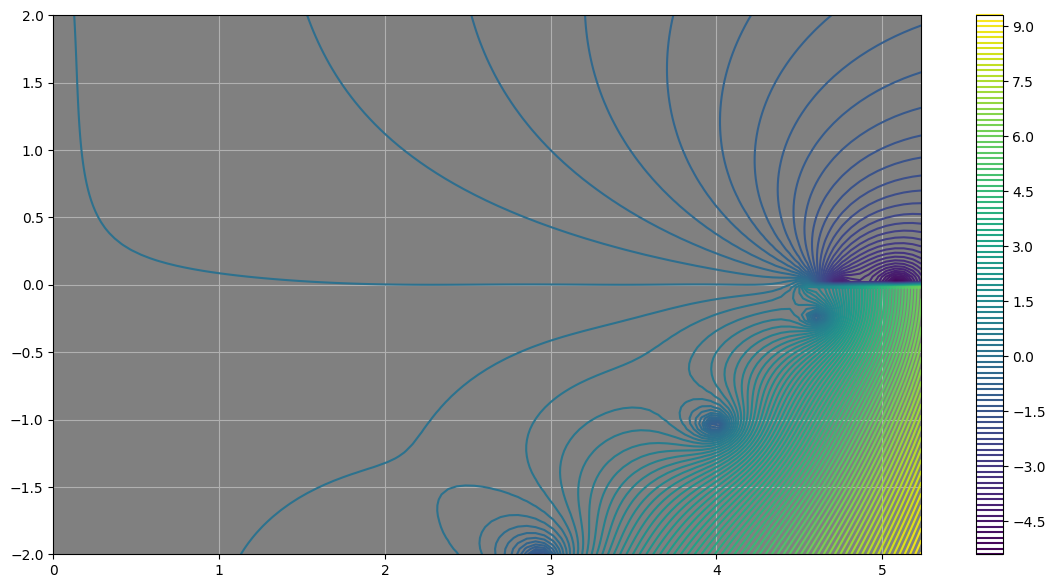

In [11]:
plotlogf(A.determinant, 0,  A.K_high, -2, 2, field_type, mode_type, indices, Zl, Zr, iref=100, rref=100,levels=100)